In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [326]:
test_split = 0.2
max_depth = 3

In [ ]:
data = load_wine()
list_class = data.target_names # Lista nomi classi
x = data.data
y = data.target

In [ ]:
list_features  = data.feature_names # Lista nomi features del vino
len(list_features),len(x[0])

(13, 13)

In [ ]:
df = pd.DataFrame(x, columns=data.feature_names) # Dataset senza i target
df_tot = df.copy() # Dataset con i tagret
df_tot['Y'] = y 
df_tot.head()
  

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [330]:
df_tot.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


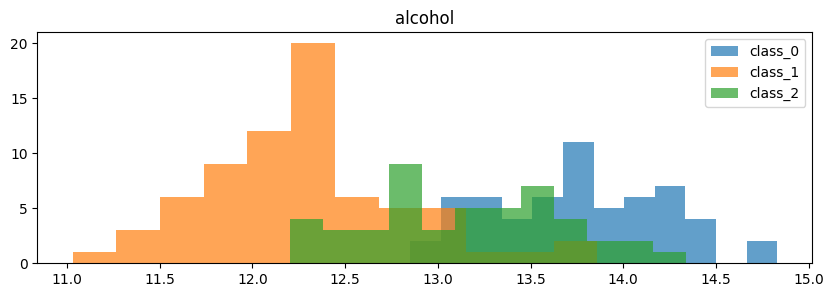

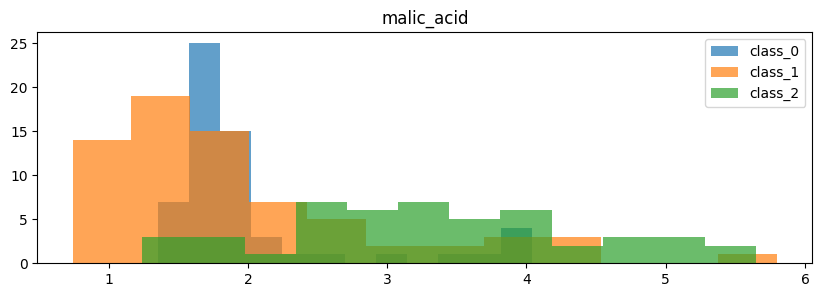

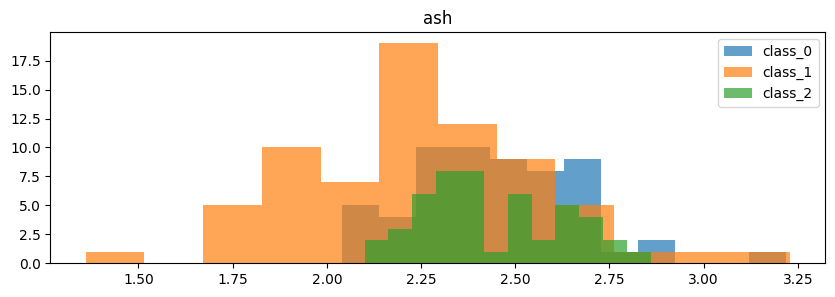

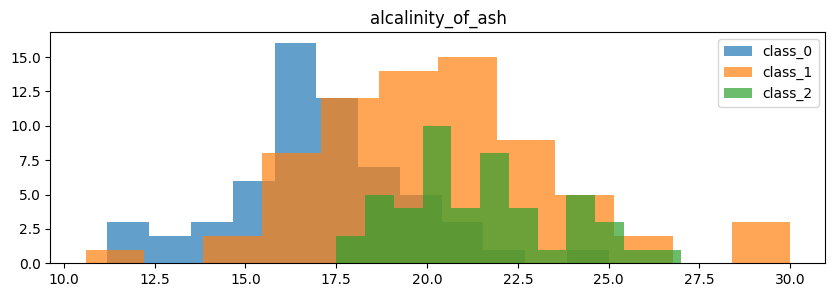

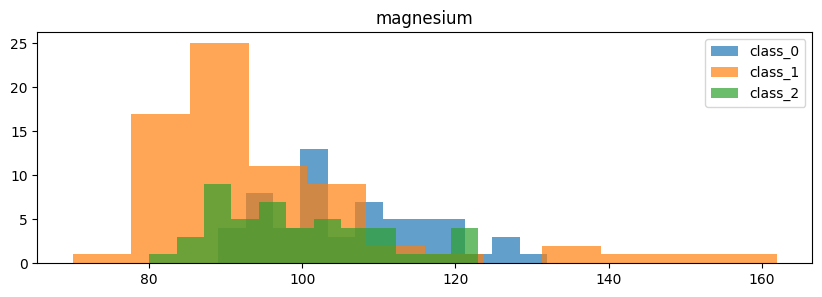

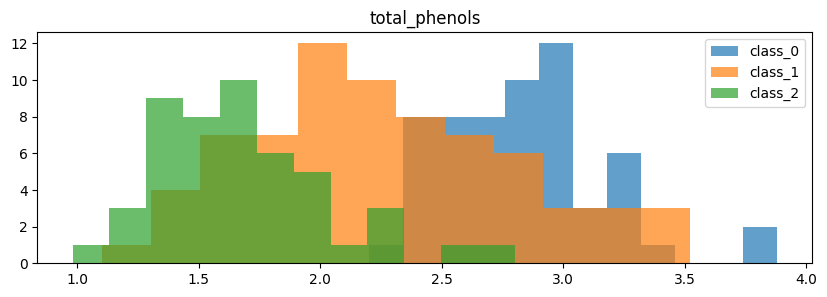

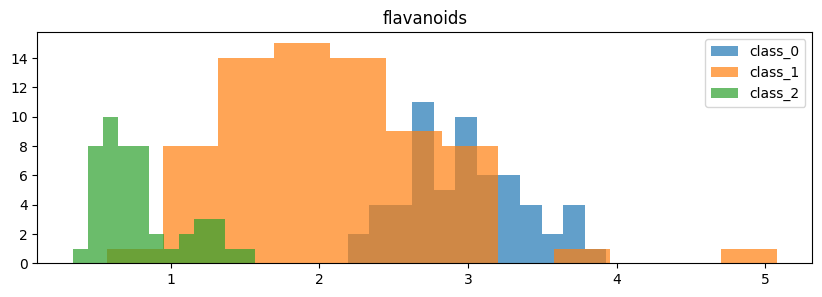

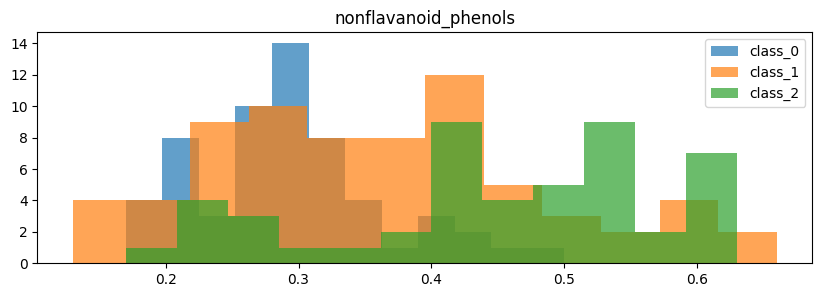

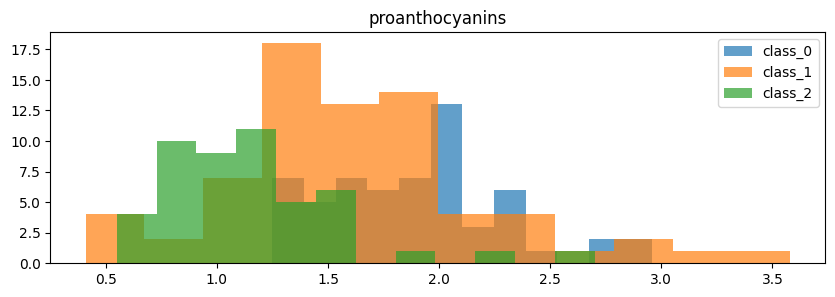

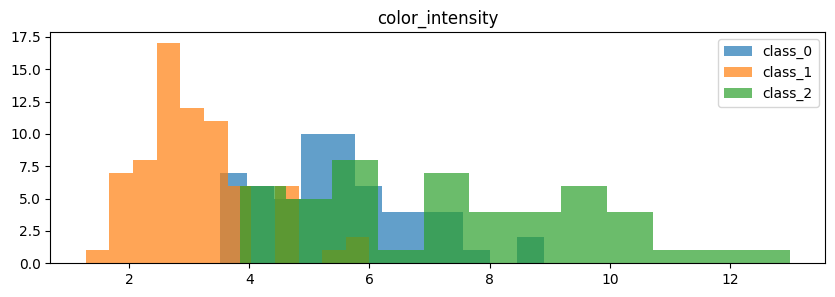

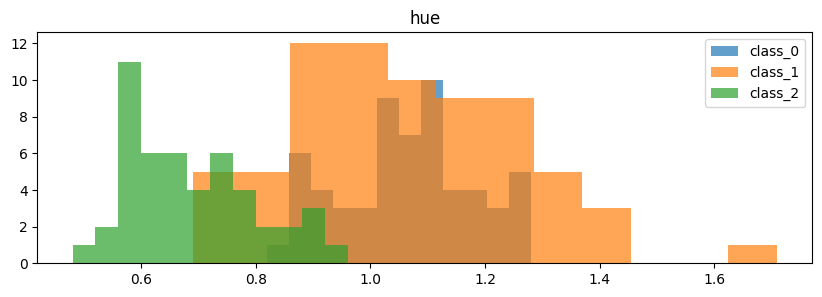

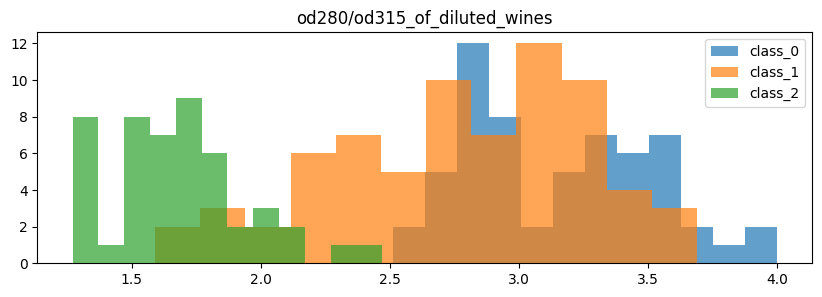

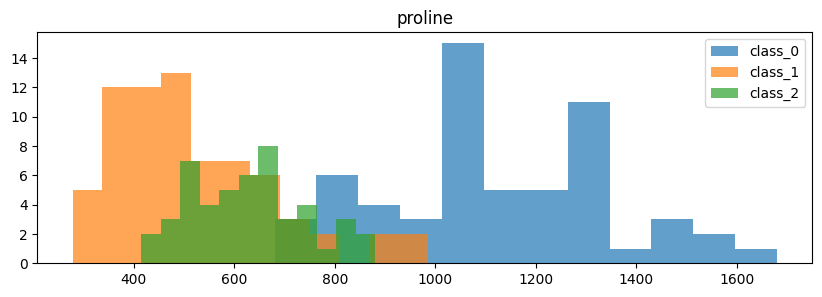

In [ ]:
# Stampo come si distribuiscono i valori di ogni feature dei vini
for f in list_features:
    plt.figure(figsize=(10,3))
    for i in range(len(list_class)):
        plt.hist(df_tot[df_tot['Y']==i][f], bins=12, label=list_class[i], alpha=0.7)
    plt.legend()
    plt.title(f)
    plt.show()

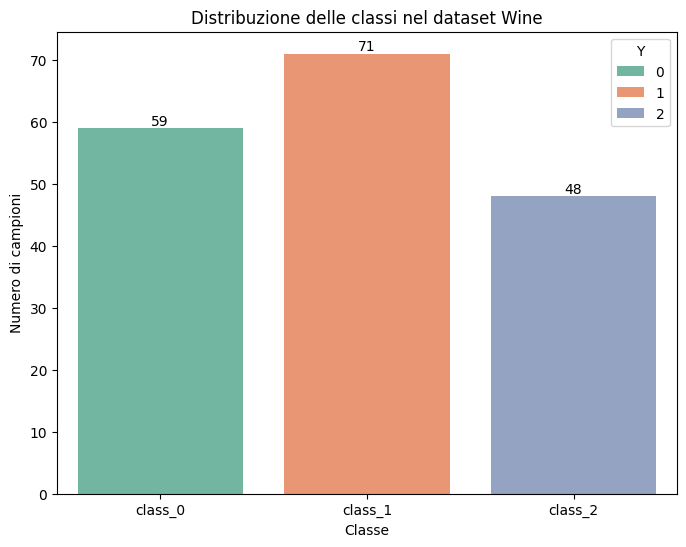

In [ ]:
# Conto quante volete compare ogni classe nel DF
plt.figure(figsize=(8,6))
ax= sns.countplot(x='Y', data=df_tot, hue='Y', palette='Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Distribuzione delle classi nel dataset Wine')
plt.xlabel('Classe')
plt.ylabel('Numero di campioni')
plt.xticks(ticks=[0,1,2], labels=list_class)
plt.show()

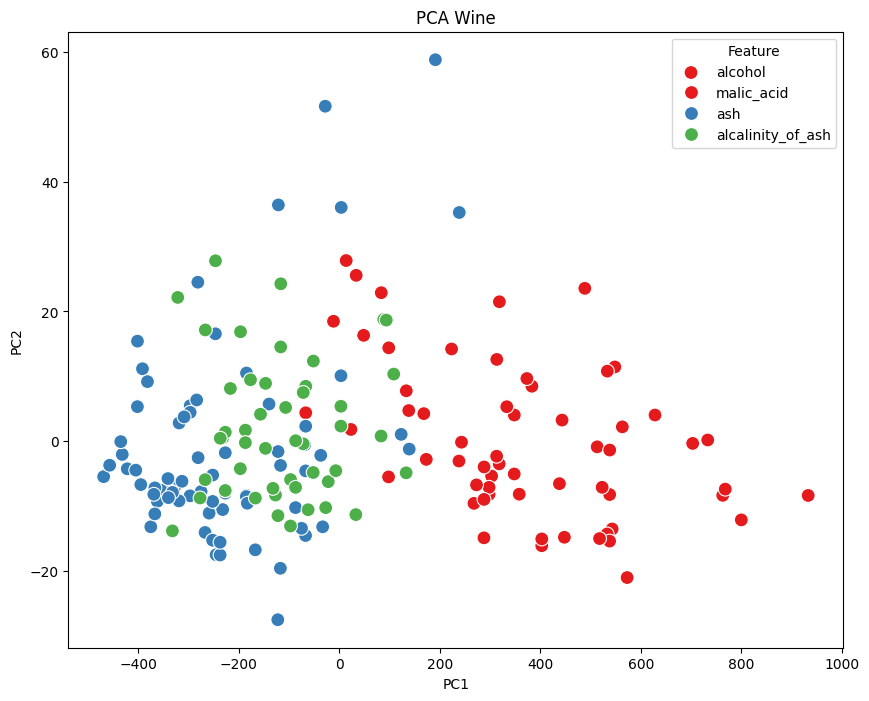

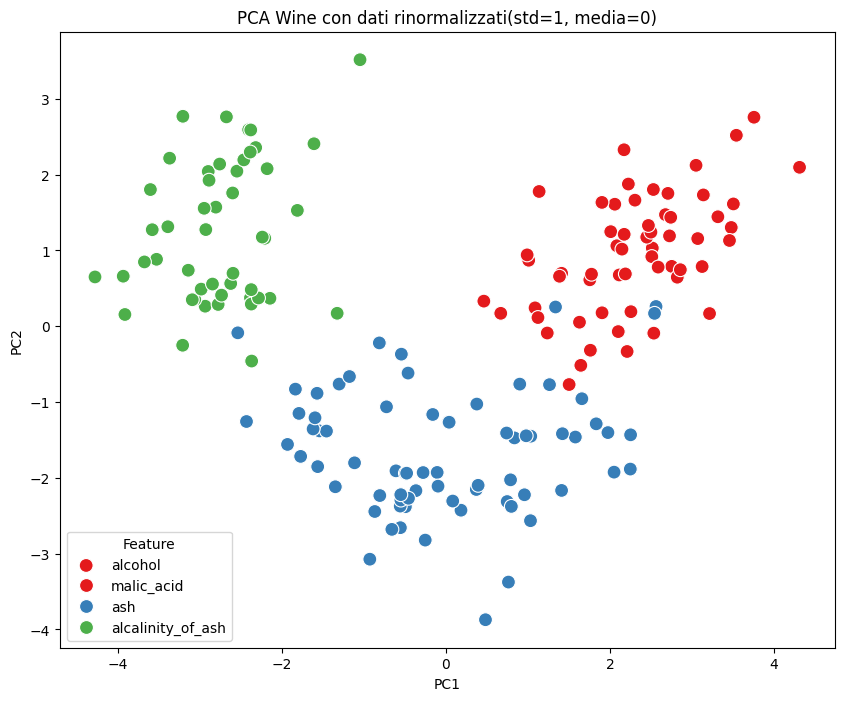

In [333]:
principal=PCA(n_components=2)
principal.fit(x)
x_pca=principal.transform(x)

df_pca = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
df_pca['Y'] = y

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Y', palette='Set1', s=100)
plt.title('PCA Wine')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Feature', labels=list_features)
plt.show()

scaling=StandardScaler()
scaling.fit(x)
Scaled_data=scaling.transform(x)

principal2=PCA(n_components=2)
principal2.fit(Scaled_data)
x_pca2=principal2.transform(Scaled_data)

df_pca2 = pd.DataFrame(data=x_pca2, columns=['PC1', 'PC2'])
df_pca2['Y'] = y

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca2, x='PC1', y='PC2', hue='Y', palette='Set1', s=100)
plt.title('PCA Wine con dati rinormalizzati(std=1, media=0)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Feature', labels=list_features)
plt.show()

In [334]:
df_pca.head()

,PC1,PC2,Y
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0
3,733.240139,0.192729,0
4,-11.571428,18.489995,0


In [335]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=test_split, random_state=42)

In [336]:
model = RandomForestClassifier(random_state=42, n_estimators = 100) 

model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [337]:
predictions = model.predict(x_test)

In [338]:
predictions[:5], list(map( lambda x: list_class[x], list(predictions)))[:5]

(array([0, 0, 2, 0, 1]),
 ['class_0', 'class_0', 'class_2', 'class_0', 'class_1'])

In [339]:
# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

report = classification_report(y_test, predictions, target_names=list_class)
print(report)

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



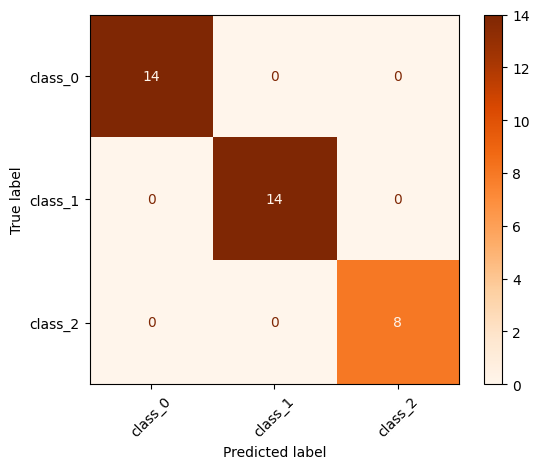

In [340]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
show_cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=list_class)
show_cm.plot(xticks_rotation=45, cmap='Oranges')

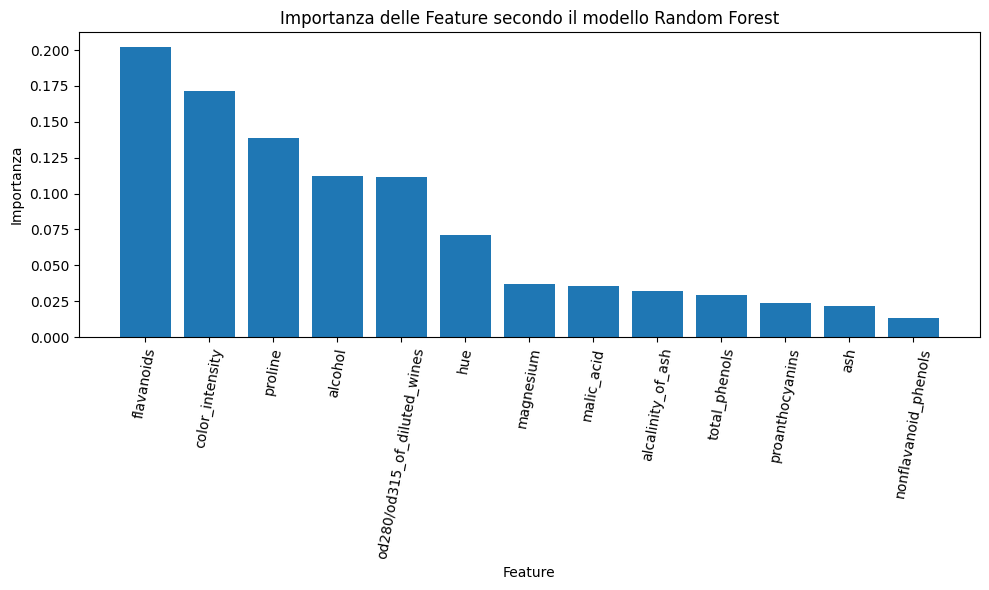

In [341]:
# Importanza delle feature
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importances)[::-1]
list_features = np.array(list_features)
plt.bar(df.columns[sorted_idx], feature_importances[sorted_idx])
plt.xticks(rotation=80)
plt.xlabel('Feature')
plt.ylabel('Importanza')
plt.title('Importanza delle Feature secondo il modello Random Forest')
plt.tight_layout()

plt.show()

In [342]:
(np.linspace(10, 150, 5)).astype(np.int16)

array([ 10,  45,  80, 115, 150], dtype=int16)

In [343]:
param_grid = {
    'n_estimators': (np.linspace(10, 150, 5)).astype(np.int16),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)


print("\nParametri migliori trovati:")
for k, value in grid_search.best_params_.items():
    print(f"\t -{k}: {value}")


Parametri migliori trovati:
	 -max_depth: None
	 -min_samples_leaf: 1
	 -min_samples_split: 2
	 -n_estimators: 45
